In [11]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_gaussian_quantiles,make_classification
from sklearn.utils.multiclass import unique_labels
import sklearn
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from keras.datasets import mnist
n_samples = 5000


X,y  = sklearn.datasets.make_moons(n_samples=n_samples, noise=.3, random_state =7)
# (X_train, y_train),(X_test,y_test) = mnist.load_data()
# X_train = X_train.reshape(X_train.shape[0],-1)
# print(X_train.shape)

plt.scatter(X[:, 0], X[:, 1], s=20, c = y)
# plt.legend()
# plt.title("Original Moon Dataset")
plt.xlabel("feature 1")
plt.ylabel("feature 2");
# plt.axis('off')
# plt.savefig("Figures/org_moon.jpg")




(10000, 28, 28)


TypeError: tuple indices must be integers or slices, not tuple

In [61]:
import time
from time import sleep
from tqdm.notebook import tqdm

pbar = tqdm(total=100)
for i in range(10):
    sleep(0.1)
    pbar.update(10)



In [20]:
## create figures for distritbution
import plotly.figure_factory as ff
import numpy as np
from sklearn.neighbors import KernelDensity as sklearn_kde

def kde(x,X0,X1,h=0.3):
    kde0 = sklearn_kde(kernel='gaussian', bandwidth=h).fit(X0)
    log_f0 = kde0.score_samples(x.reshape(1, -1))[0] # this function return log(density)
    kde1 = sklearn_kde(kernel='gaussian', bandwidth=h).fit(X1)
    log_f1 = kde1.score_samples(x.reshape(1, -1))[0] # this function return log(density)
    return log_f0 - log_f1

num_samples = 400
x1 = np.random.randn(num_samples)

x2 = np.random.randn(num_samples-200) + 7
x2 = np.concatenate((x2, np.random.randn(num_samples-200)+5) )

# kde(x,x1,x2, h=0.3)
    
group_labels = ['Class A', 'Class B']
colors = ['#3366CC', '#37AA9C']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot([x1, x2], group_labels,show_hist=False, bin_size=.2,
                         curve_type='normal',colors = colors, show_rug=False)                       
# Add title
fig.update_layout(title_text='Posteriors Distribution',)
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
    
})
fig.update_xaxes(visible=False); fig.update_yaxes(visible=False)
fig.show()
fig.write_image("Figures/distibution.png")                         


ValueError: 
    Invalid value of type 'builtins.str' received for the 'width' property of layout
        Received value: '3'

    The 'width' property is a number and may be specified as:
      - An int or float in the interval [10, inf]

In [37]:
import numpy as np

def sample_spherical(x , npoints):
    """
    sample a point on n-sphere centered by x
    """
    ndim = len(x)
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    vec = vec.T
    #sanity check if the length of points are 1
    for v in vec:# loop all points
        s = 0
        for i in range(ndim):# loop all dims
            s += v[i]**2
        if s - 1> 0.000001 : raise ValueError('Initial value is not on sphere')
    print("vec",vec)
    vec = vec+x
    return vec

x = np.array([1,1])
v = sample_spherical(x,1)
print(v)
## test gradient on sphere

vec [[ 0.21869349 -0.9757936 ]]
[[1.21869349 0.0242064 ]]


(150, 2) (50, 2)


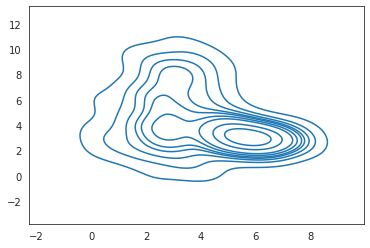

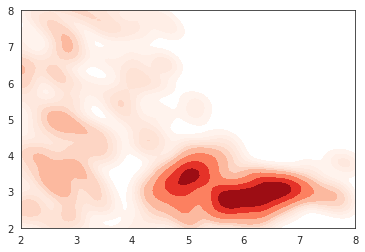

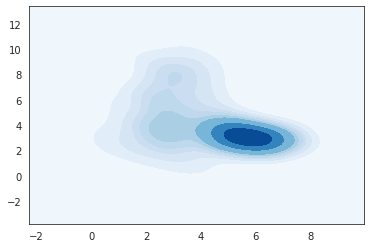

In [102]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = sns.load_dataset('iris')
 
# set seaborn style
sns.set_style("white")
df = np.array(df)[:, 0:2]

mean = [7,7]
cov = [[1, 0], [0, 2]] 
s0 = np.random.multivariate_normal( mean, cov, 100)

mean = [3,7]
cov = [[1, 0], [0, 3]] 
s0 = np.random.multivariate_normal( mean, cov, 100)

mean = [4,6]
cov = [[0.5, 0], [0, 1]] 
s1 = np.random.multivariate_normal( mean, cov, 100)

mean = [3,3]
cov = [[2, 0], [0, 2]] 
s1 = np.random.multivariate_normal( mean, cov, 100)

print(df.shape, s.shape)
df = np.concatenate((df, s0, s1) )

# Basic 2D density plot
sns.kdeplot(x=df[:,0], y=df[:,1])
plt.show()
 
# Custom the color, add shade and bandwidth
sns.kdeplot(x=df[:,0], y=df[:,1], cmap="Reds", shade=True, bw_adjust=0.3)
plt.xlim(2, 8)
plt.ylim(2, 8)
plt.show()

# Add thresh parameter
sns.kdeplot(x=df[:,0], y=df[:,1], cmap="Blues", shade=True, thresh=0)
plt.show()

In [64]:
## testing k nearest neighbors distance
import numpy as np
from sklearn.neighbors import NearestNeighbors
X = [[0, 0, 2], [1, 0, 0], [0, 0, 1], [0, 1, 1]]
x= [0,1,1.2] 
neigh = NearestNeighbors(n_neighbors=2, radius=1)
neigh.fit(X)
nb_idx = np.array(neigh.kneighbors([x], 5,  return_distance=True))
print(nb_idx)
print(nb_idx.shape)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 4, n_neighbors = 5

In [86]:
from numpy.linalg import norm
gradient = np.array([1,3])
prev_x = np.array([2,2])
tangent_vec = gradient - (np.dot(gradient,prev_x)/norm(prev_x)**2)*(prev_x)
print("Dot product tangent and x(should be zero)",np.dot(tangent_vec,prev_x)  )

Dot product tangent and x(should be zero) 1.7763568394002505e-15


In [13]:
# test entropy
from scipy.stats import entropy
a=[0.9, 0.1]
entropy(a, base=2)

0.46899559358928117

In [23]:
import numpy as np
import cupy as cp
a = np.array([[1],[3],[5]])
b = np.array([[1,2,],[3,4],[5,6]])
print(a.shape)
print(a*b)

(3, 1)
[[ 1  2]
 [ 9 12]
 [25 30]]


In [ ]:
######AUC curb

